In [15]:
import numpy as np

from keras.datasets import mnist

from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Activation, Dropout
from keras.utils import to_categorical

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train =  x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total para

In [7]:
model.fit(x_train, y_train, 
          batch_size=64, epochs=10,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.2239 - acc: 0.9328 - val_loss: 0.1048 - val_acc: 0.9661
Epoch 2/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0998 - acc: 0.9698 - val_loss: 0.0805 - val_acc: 0.9760
Epoch 3/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0734 - acc: 0.9769 - val_loss: 0.0690 - val_acc: 0.9777
Epoch 4/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.0594 - acc: 0.9809 - val_loss: 0.0616 - val_acc: 0.9818
Epoch 5/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.0487 - acc: 0.9841 - val_loss: 0.0615 - val_acc: 0.9818
Epoch 6/10
60000/60000 [==============================] - 22s 364us/step - loss: 0.0428 - acc: 0.9859 - val_loss: 0.0627 - val_acc: 0.9819
Epoch 7/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.0404 - acc: 0.9871 - val_loss: 0.

In [8]:
model.evaluate(x_test, y_test, verbose=0)

[0.071050967025859793, 0.98229999999999995]

In [9]:
tmp_model = Model(model.inputs, model.layers[-2].output)

In [10]:
def softmax(x, t=1.0):
    x_exp = np.exp(x / t)
    return x_exp / x_exp.sum(axis=1, keepdims=True)

In [11]:
result = {}
for t in tqdm_notebook([1, 4, 16, 32, 128]):
    probs_train = softmax(tmp_model.predict(x_train), t=10)
    for k in tqdm_notebook(range(2, 8), leave=False):
        new_model = Sequential()
        new_model.add(Flatten(input_shape=(28, 28)))
        new_model.add(Dense(512 // 2 ** k, activation='relu'))
        new_model.add(Dropout(0.2))
        new_model.add(Dense(256 // 2 ** k, activation='relu'))
        new_model.add(Dropout(0.2))
        new_model.add(Dense(10))
        new_model.add(Activation('softmax'))

        new_model.compile('adam', 'kullback_leibler_divergence', metrics=['accuracy'])

        new_model.fit(x_train, probs_train, 
                      batch_size=64, epochs=10,
                      validation_data=(x_test, y_test), verbose=0)
        
        result[(t, k)] = new_model.evaluate(x_test, y_test, verbose=0)
        print(result[(t, k)])

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.76050602769851683, 0.96870000000000001]
[0.76693457145690913, 0.96409999999999996]
[0.85452921733856202, 0.94440000000000002]
[1.0702880208969117, 0.90820000000000001]
[1.4849752365112305, 0.69259999999999999]
[1.8244548496246338, 0.4703]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.74499088935852054, 0.97199999999999998]
[0.79157274065017702, 0.9647]
[0.89632469329833986, 0.94230000000000003]
[1.0959786905288695, 0.91239999999999999]
[1.47157469997406, 0.71509999999999996]
[1.8206862621307374, 0.49819999999999998]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.75145816259384157, 0.97130000000000005]
[0.79225615482330325, 0.96009999999999995]
[0.86421789999008181, 0.94510000000000005]
[1.0789415132522584, 0.91090000000000004]
[1.4878063201904297, 0.76090000000000002]
[1.8255890186309816, 0.45169999999999999]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.72880734701156613, 0.9708]
[0.78904442405700681, 0.96060000000000001]
[0.88033636093139644, 0.94579999999999997]
[1.0626738943099976, 0.91669999999999996]
[1.4466085748672486, 0.78839999999999999]
[1.8122941864013671, 0.38579999999999998]


HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.74291224756240848, 0.97050000000000003]
[0.77575161561965944, 0.96330000000000005]
[0.85737092857360842, 0.94740000000000002]
[1.0402377122879027, 0.92230000000000001]
[1.4570035800933838, 0.75380000000000003]
[1.8119912986755371, 0.42780000000000001]



In [12]:
result_baseline = {}

for k in tqdm_notebook(range(2, 8), leave=False):
    new_model = Sequential()
    new_model.add(Flatten(input_shape=(28, 28)))
    new_model.add(Dense(512 // 2 ** k, activation='relu'))
    new_model.add(Dropout(0.2))
    new_model.add(Dense(256 // 2 ** k, activation='relu'))
    new_model.add(Dropout(0.2))
    new_model.add(Dense(10))
    new_model.add(Activation('softmax'))

    new_model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

    new_model.fit(x_train, y_train, 
                  batch_size=64, epochs=10,
                  validation_data=(x_test, y_test), verbose=0)
        
    result_baseline[k] = new_model.evaluate(x_test, y_test, verbose=0)
    print(result_baseline[k])

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

[0.069768972978880628, 0.98019999999999996]
[0.094797487360611554, 0.9718]
[0.15818538923822342, 0.95709999999999995]
[0.27667453516721724, 0.92949999999999999]
[0.83069839057922368, 0.74060000000000004]
[1.3986819313049317, 0.51929999999999998]


In [13]:
result_baseline

{2: [0.069768972978880628, 0.98019999999999996],
 3: [0.094797487360611554, 0.9718],
 4: [0.15818538923822342, 0.95709999999999995],
 5: [0.27667453516721724, 0.92949999999999999],
 6: [0.83069839057922368, 0.74060000000000004],
 7: [1.3986819313049317, 0.51929999999999998]}

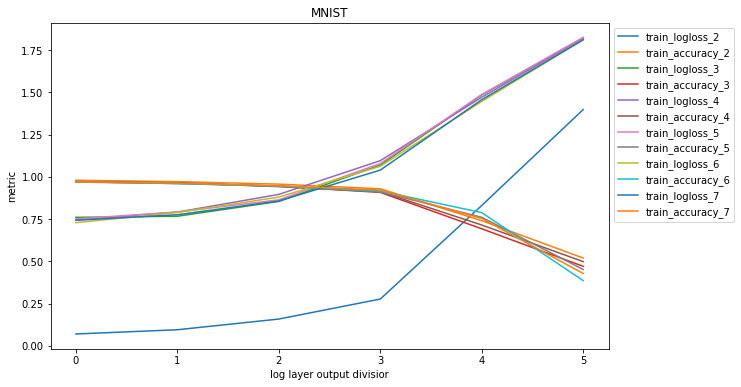

In [39]:
legend = []

plt.figure(figsize=(10, 6))
plt.title('MNIST')
plt.plot([result_baseline[i] for i in range(2, 8)])
for i in range(2, 8):
    legend += ['train_logloss_{}'.format(i), 
               'train_accuracy_{}'.format(i)]

for t in [1, 4, 16, 32, 128]:
    plt.plot([result[(t, i)] for i in range(2, 8)])
    for i in range(2, 8):
        legend += ['distill_t_{}_logloss_{}'.format(t, i), 
                   'distill_t_{}_accuracy_{}'.format(t, i)]
    
plt.ylabel('metric')
plt.xlabel('log layer output divisior')
plt.legend(legend, bbox_to_anchor=(1.0, 1.0))